In [39]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas_profiling as pdp
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

<Figure size 432x216 with 0 Axes>

In [40]:
data =pd.read_csv(r"creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Resampling stratergy
  Dataset is highly imbalanced. Fraudulent transactions are only 0.17% from entire dataset. Direct oversampling or under sampling will not work for the dataset. 
  Lest do mix of oversampling and under   sampling to cover more data points from none-fraudulent than taking just 492 records out of 284308 samples.
- Lets take random 5% from none-fraudulent transactions

- Then will oversample fraudulent transactions to match with none-fraudulent

In [41]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and over sampling to increase number of samples
leg_df = data[data.Class == 0]
fraud_df = data[data.Class == 1]

no_of_samples = round(leg_df.shape[0] * 0.05)
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(leg_df, n_samples=no_of_samples, random_state=15)
# leg_df_2.describe()
df_sampled = pd.concat([leg_df_2,fraud_df],axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42)

x,y = ros.fit_resample(x_sampled,y_sampled)

In [42]:
x.drop(['Amount','Time'], axis=1, inplace=True)

## Train & Test Split
We will examine the data against some models
- Logistic Regression¶
- DecisionTreeClassifier
- XGBClassifier
- Gradient Boosting Classifier

In [43]:
y.value_counts()
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify=y, random_state=12)
y_train.value_counts(), y_test.value_counts()

(0    10662
 1    10662
 Name: Class, dtype: int64,
 1    3554
 0    3554
 Name: Class, dtype: int64)

### Defining Evaluation criteria¶


In [44]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


### Printing functions
- print_results
- Plot_confusion_matrix
- Plot_roc_curve


In [45]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [46]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [47]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

# Models Building

### Logistic Regression¶


Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.9473832301631964
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3554
           1       0.97      0.92      0.95      3554

    accuracy                           0.95      7108
   macro avg       0.95      0.95      0.95      7108
weighted avg       0.95      0.95      0.95      7108



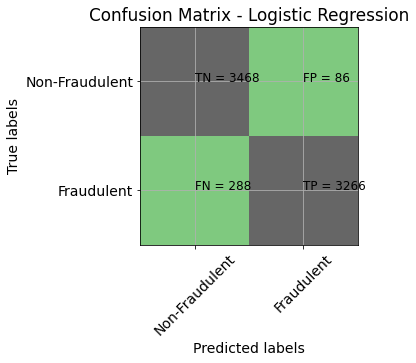

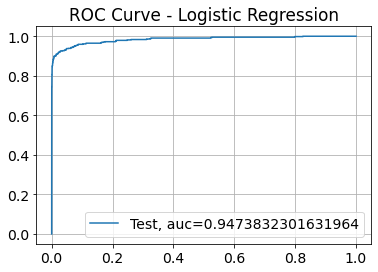

In [48]:
lr_model = LogisticRegression(max_iter=200,random_state=12)
lr_model.fit(x_train,y_train)
pred1 = lr_model.predict(x_test)
prob1 = lr_model.predict_proba(x_test)
print_results("Logistic Regression", y_test, pred1,prob1[:,-1])

### DecisionTreeClassifier

In [49]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(x_train, y_train)
dt_yhat = DT.predict(x_test)

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))


Accuracy score of the Decision Tree model is 0.9373944850872257
F1 score of the Decision Tree model is 0.9340252038547072


DecisionTree
--------------------------------------------------------------------------
accuracy score :0.9373944850872257
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3554
           1       0.99      0.89      0.93      3554

    accuracy                           0.94      7108
   macro avg       0.94      0.94      0.94      7108
weighted avg       0.94      0.94      0.94      7108



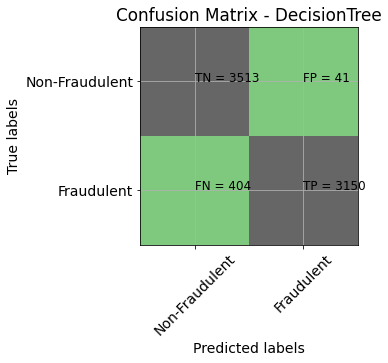

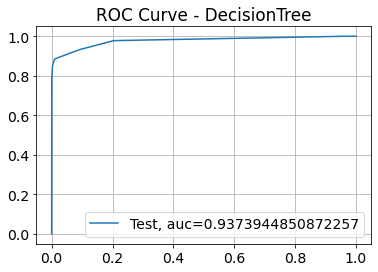

In [50]:
prob1 = DT.predict_proba(x_test)
print_results("DecisionTree", y_test, dt_yhat,prob1[:,-1])

### XGBClassifier


In [51]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)
xgb_yhat = xgb.predict(x_test)

[12:38:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

Accuracy score of the XGBoost model is 0.9991558806978053
F1 score of the XGBoost model is 0.9991565926342423


array([[3548,    6],
       [   0, 3554]], dtype=int64)

XGBClassifier
--------------------------------------------------------------------------
accuracy score :0.9991558806978053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



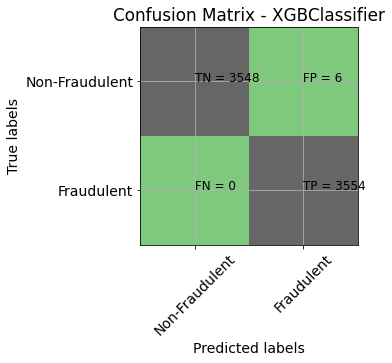

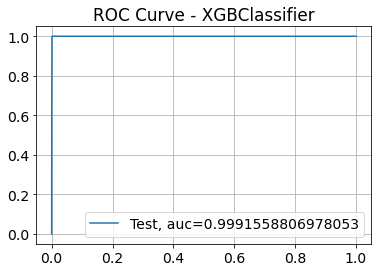

In [53]:
prob1 = xgb.predict_proba(x_test)
print_results("XGBClassifier", y_test, xgb_yhat,prob1[:,-1])

### Bagging Classifier¶


Bagging Classifier
--------------------------------------------------------------------------
accuracy score :0.9991558806978053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



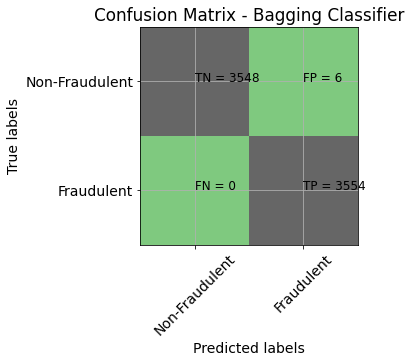

In [54]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

bcf_model = BaggingClassifier(DecisionTreeClassifier(),
                              n_estimators=200,
                              max_samples=0.8,
                              max_features=0.8,
                              oob_score=True,
                              random_state=12)
bcf_model.fit(x_train,y_train)
pred2 = bcf_model.predict(x_test)
print_results("Bagging Classifier", y_test, pred2)

In [55]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.947383,0.974344,0.918965,0.945844
1,DecisionTree,0.937394,0.987151,0.886325,0.934025
2,XGBClassifier,0.999156,0.998315,1.000000,0.999157
3,Bagging Classifier,0.999156,0.998315,1.000000,0.999157


#### GradientBoostingClassifier

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.990151941474395
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3554
           1       0.99      0.99      0.99      3554

    accuracy                           0.99      7108
   macro avg       0.99      0.99      0.99      7108
weighted avg       0.99      0.99      0.99      7108



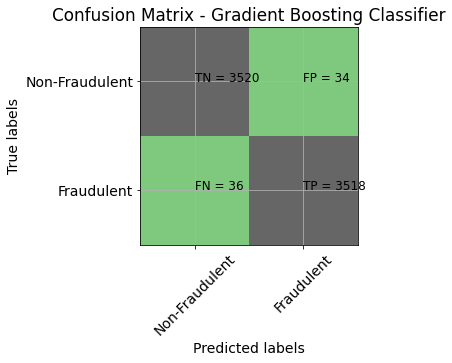

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train,y_train)
pred = gbc_model.predict(x_test)
pred_prob = gbc_model.predict_proba(x_test)
print_results("Gradient Boosting Classifier", y_test, pred)

In [57]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.947383,0.974344,0.918965,0.945844
1,DecisionTree,0.937394,0.987151,0.886325,0.934025
2,XGBClassifier,0.999156,0.998315,1.000000,0.999157
3,Bagging Classifier,0.999156,0.998315,1.000000,0.999157
4,Gradient Boosting Classifier,0.990152,0.990428,0.989871,0.990149


### ANN model

In [58]:
def create_model():
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape=[28]))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))

    model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [59]:
classifier = create_model()
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               7424      
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)               

In [60]:
early_stopping = EarlyStopping(patience = 20, min_delta = 0.001, 
                                               restore_best_weights =True )

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaller = StandardScaler()

x_train_scaled = scaller.fit_transform(x_train)
x_test_scaled = scaller.transform(x_test)

In [62]:
history  = classifier.fit(x_train_scaled,
               y_train,
               epochs=500,
               validation_split=0.25,
               callbacks=[early_stopping],
               verbose=1)

Epoch 1/500
500/500 [==============================] - 2s 3ms/step - loss: 0.1622 - accuracy: 0.9433 - val_loss: 0.1023 - val_accuracy: 0.9640
Epoch 2/500
500/500 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9695 - val_loss: 0.0434 - val_accuracy: 0.9796
Epoch 3/500
500/500 [==============================] - 1s 3ms/step - loss: 0.0518 - accuracy: 0.9797 - val_loss: 0.0422 - val_accuracy: 0.9848
Epoch 4/500
500/500 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9871 - val_loss: 0.0268 - val_accuracy: 0.9916
Epoch 5/500
500/500 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9884 - val_loss: 0.0195 - val_accuracy: 0.9942
Epoch 6/500
500/500 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0260 - val_accuracy: 0.9940
Epoch 7/500
500/500 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0431 - val_accuracy: 0.9889

In [63]:
y_pred = classifier.predict(x_test_scaled)

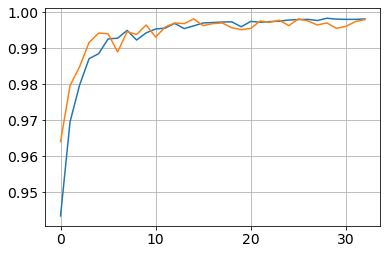

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

ANN 
--------------------------------------------------------------------------
accuracy score :0.9957794034890265
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3554
           1       0.99      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



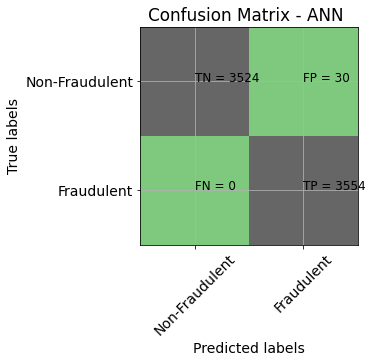

In [66]:
print_results("ANN ", y_test, y_pred)

In [67]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.947383,0.974344,0.918965,0.945844
1,DecisionTree,0.937394,0.987151,0.886325,0.934025
2,XGBClassifier,0.999156,0.998315,1.000000,0.999157
3,Bagging Classifier,0.999156,0.998315,1.000000,0.999157
4,Gradient Boosting Classifier,0.990152,0.990428,0.989871,0.990149
5,ANN,0.995779,0.991629,1.000000,0.995797
